## **Задание №1**

> _**Пункт 1.**_  Сформулировать постановку задачи, которую планируется решать в рамках курса.

### 📌 **Бизнес-постановка задачи**
Данное исследование направлено на предсказание медианной стоимости жилья в Калифорнии в 1990 году. Проект ориентирован на анализ рыночных тенденций того времени и выявление ключевых факторов, влияющих на стоимость недвижимости.

### 🧠 **Постановка ML-задачи**
Разработать модель машинного обучения для решения задачи регрессии, которая будет предсказывать стоимость жилья в Калифорнии на основе различных характеристик недвижимости и окружающей среды. Учитывая возможность нелинейных зависимостей в данных, выбор конкретного метода регрессии (линейного, полиномиального, регуляризованного или на основе деревьев решений или ...) остается открытым и будет определен после анализа данных.

### 📊 **Описание набора данных** 

Данный набор данных **California Housing Prices** был взят с сайта Kaggle ([ссылка](https://www.kaggle.com/datasets/camnugent/california-housing-prices/data)) и включает в себя характеристики цен на жилье в Калифорнии, позволяющие оценить стоимость недвижимости в зависимости от множества факторов. Он содержит следующие столбцы:

- **longitude**: Географическая координата, показывающая, насколько дом расположен на западе; более высокое значение указывает на более западное положение.

- **latitude**: Географическая координата, показывающая, насколько дом расположен на севере; более высокое значение указывает на более северное положение.

- **housingMedianAge**: Медианный возраст домов в пределах **block** (в данном контексте можно воспринимать как квартал или участок земли); более низкое значение соответствует более новым зданиям.

- **totalRooms**: Общее количество комнат в пределах квартала.

- **totalBedrooms**: Общее количество спален в пределах квартала.

- **population**: Общее количество людей, проживающих в пределах квартала.

- **households**: Общее количество домохозяйств (групп людей, проживающих в одном жилом помещении) в пределах квартала.

- **medianIncome**: Медианный доход для домохозяйств в пределах квартала (измеряется в десятках тысяч долларов США).

- **medianHouseValue**: Медианная стоимость жилья для домохозяйств в пределах квартала (измеряется в долларах США).

- **oceanProximity**: Расположение дома относительно океана, залива или просто внутри/на острове.

**Целевая переменная - median_house_value**: Средняя стоимость жилья для домохозяйств в пределах квартала (измеряется в долларах США)

> _**Пункт 2.**_  Выбрать и обосновать метрику для измерения качества.


Для задачи предсказания цен на жилье рекомендуются три метрики: **MAE** — чтобы минимизировать влияние выбросов, так как MAE одинаково учитывает все отклонения; **RMSE** — для учета крупных ошибок, так как она штрафует за значительные отклонения (особенно важные при выбросах в ценах); и **R²** — для оценки общей точности модели, не заостряя внимание на отдельных ошибках.

> _**Пункт 3.**_  Провести EDA на своих данных

In [28]:
# импорт необходимых библиотек
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

## **EDA**
### Просмотр датасета и его особенностей 

In [29]:
# Подгрузка датасета 
df = pd.read_csv('../data/housing.csv')
print('Размер датасета :', df.shape)

Размер датасета : (20640, 10)


In [30]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [31]:
# Первичная информация о структуре DF (позволит оценить основные показатели в целом)
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [32]:
# Значение категориальной переменной "близость к океану". Потребуется пре
df["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

<Axes: ylabel='count'>

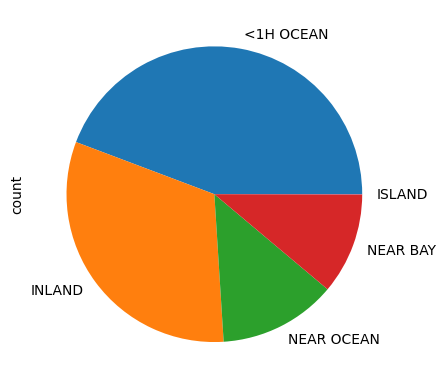

In [33]:
df['ocean_proximity'].value_counts().plot(kind='pie')

In [34]:
# количесвто NaN значений
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [35]:
# По оценке df.info() и df.isna().sum() в столбце total_bedrooms присутсвуют NaN значения (всего таких строк 207)
# Из-за маленького числа 207 из 20640, можно просто убрать эти строчки из датасета 
# (или заменить их на среднее число дальнейший анализ покажет, насколько важен столбец total_bedrooms для оценки жилья)
df[df.isnull().any(axis=1)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


### Гистограммы

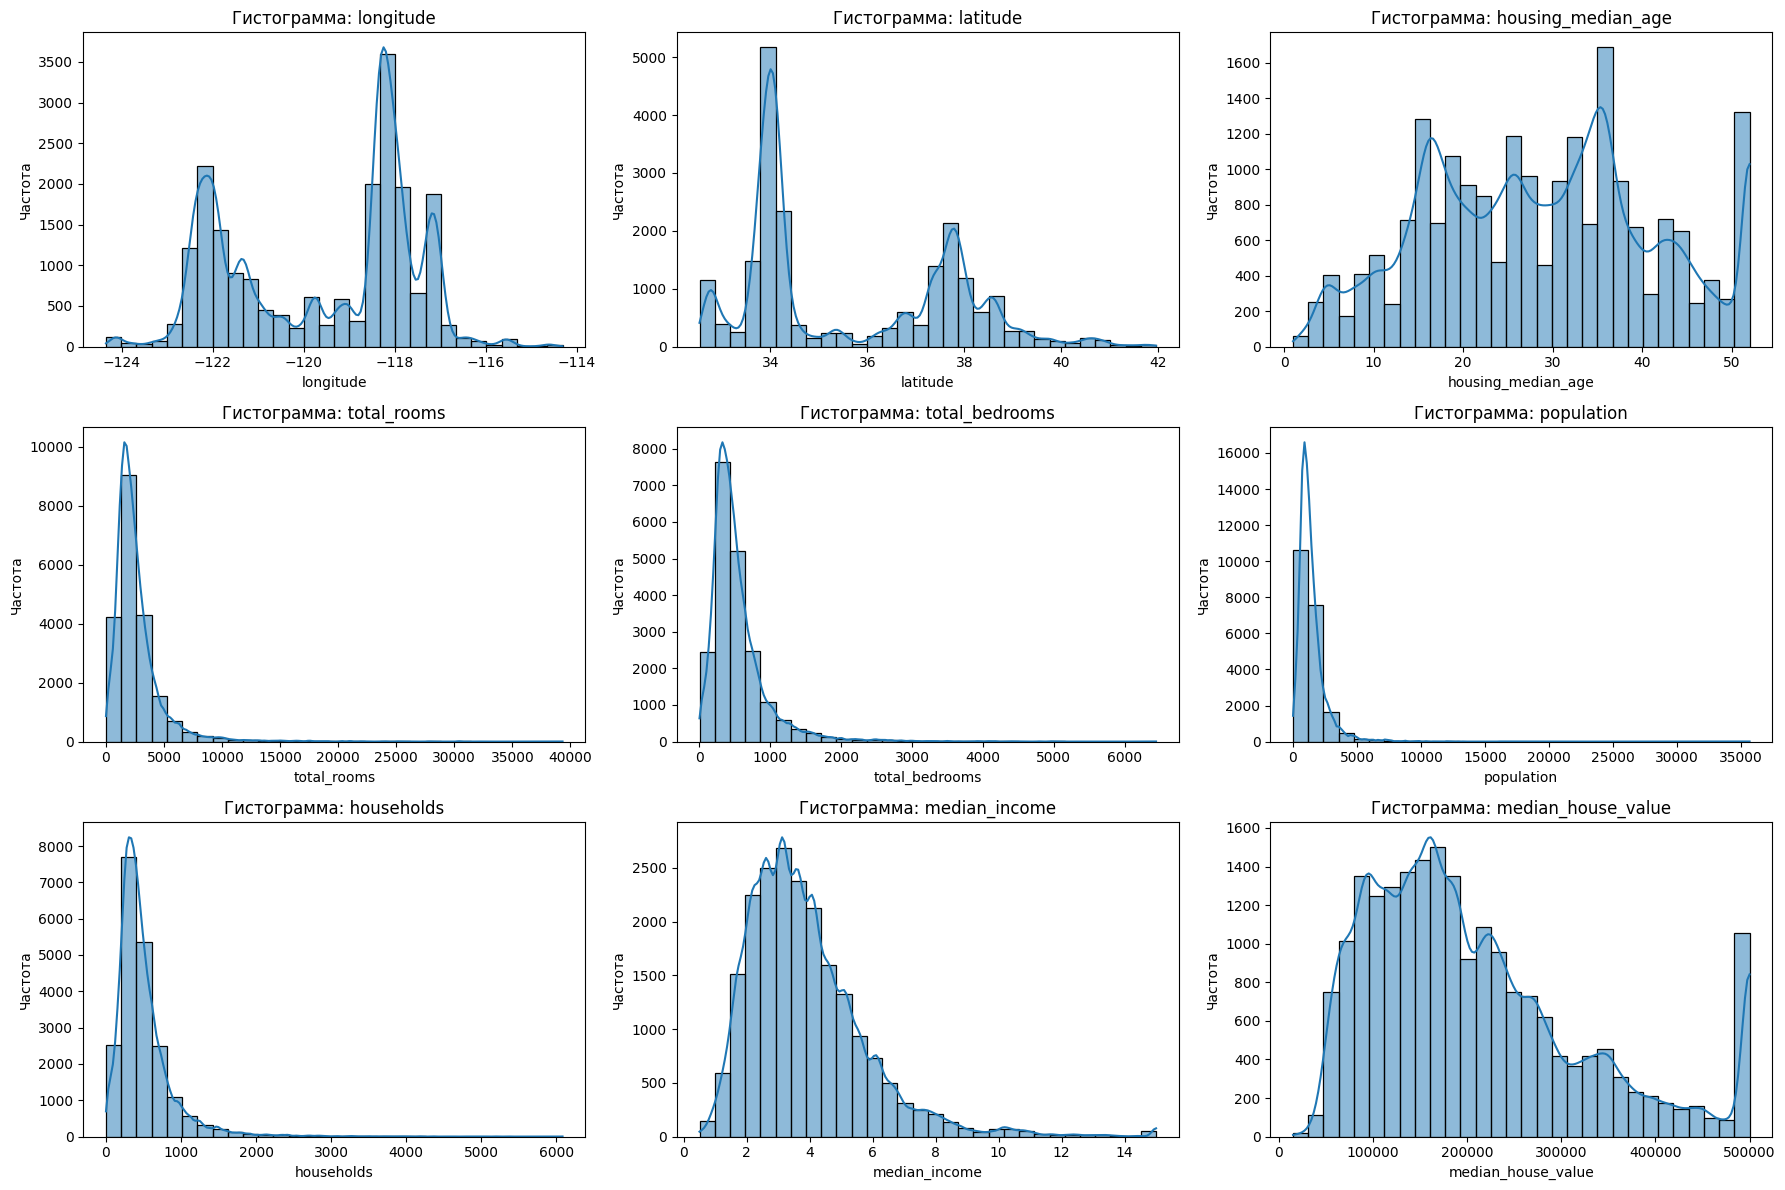

In [36]:
# Создаем гистограммы для всех числовых столбцов
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Настройка графиков с 3 в строке
plt.figure(figsize=(18, 12))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True, bins=30, kde_kws={'bw_adjust': 0.5})
    plt.title(f'Гистограмма: {col}')
    plt.xlabel(col)
    plt.ylabel('Частота')

plt.tight_layout()
plt.show()

Если оценивать по распределению то:
- расположение по longitude и latitude, показывает, что данные не сосредоточенны в одной точке, а скроее всего распередяется вдоль берега и заходят в часть материка (посмотрим на георасположение в соответсвующем пункте) 
- housing_median_age имеет самое неравномерное распеределение, много пиков 
- median_house_value около 500 000 неожиданные всплеск 
- остальные столбцы более равномерные и плавные  

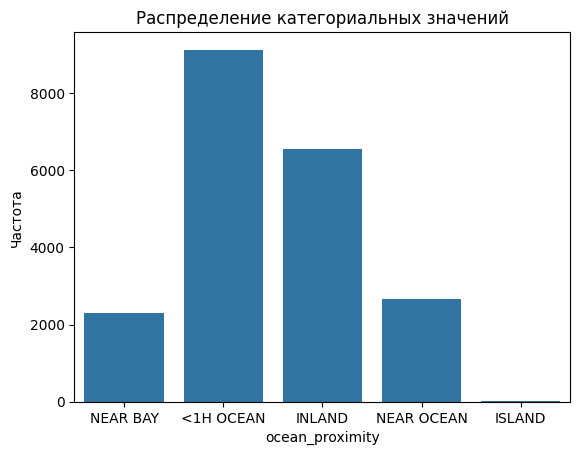

In [37]:
# Построение столбчатой диаграммы
sns.countplot(data=df, x='ocean_proximity')
plt.xlabel('ocean_proximity')
plt.ylabel('Частота')
plt.title('Распределение категориальных значений')
plt.show()

### Выбросы

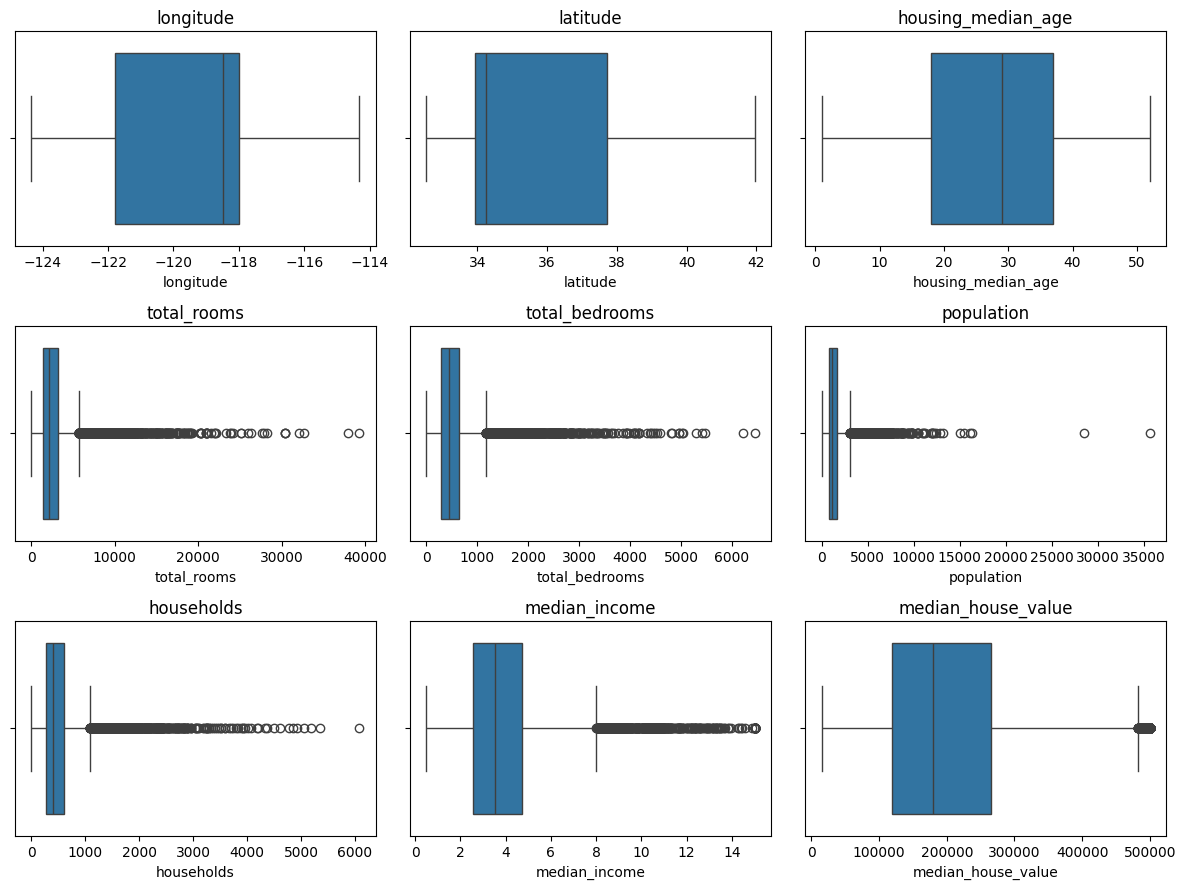

In [38]:
# Построение box plot для числовых переменных
fig, axes = plt.subplots(3, 3, figsize=(12, 9))
axes = axes.flatten()

# Построение box plot для каждой числовой переменной
for i, column in enumerate(df.select_dtypes(include='number').columns):
    sns.boxplot(x=df[column], ax=axes[i])
    axes[i].set_title(f'{column}')

plt.tight_layout()
plt.show()

Большинство переменных, таких как **total_rooms, total_bedrooms, population, households, median_income**, имеют множество выбросов на высоких значениях, что указывает на наличие объектов или районов с характеристиками, значительно превышающими средние значения.
В случае с **median_house_value** выбросы сосредоточены в одном значении, возможно, это просто верхняя граница максимальных значений для всех домов.

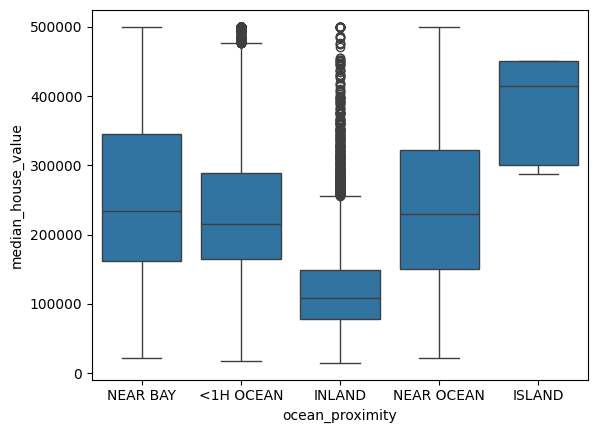

In [39]:
# Анализ взаимосвязи ocean_proximity с целевой переменной
sns.boxplot(x='ocean_proximity', y='median_house_value', data=df)
plt.show()

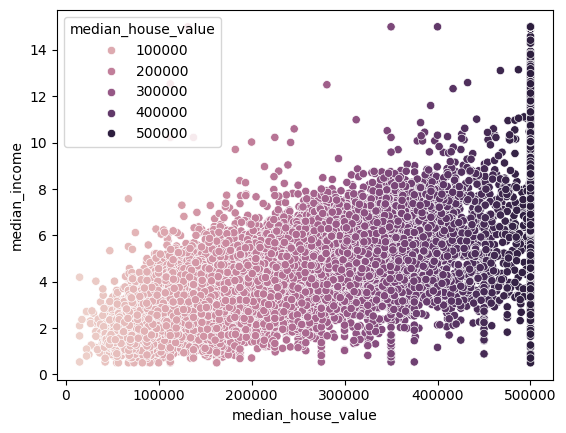

In [40]:
# Построение диаграммы рассеивания
sns.scatterplot(x=df['median_house_value'], y=df['median_income'], hue=df['median_house_value']);

### Корреляция 

Для определения линейной зависимости между всеми столбцами преобразим категориальный столбец ocean_proximity с помощью One-hot encoding

In [41]:
# One-hot encoding для категориальной переменной
df_encoded = pd.get_dummies(df, columns=['ocean_proximity'])
df_encoded

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,False,True,False,False,False
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,False,True,False,False,False
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,False,True,False,False,False
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,False,True,False,False,False


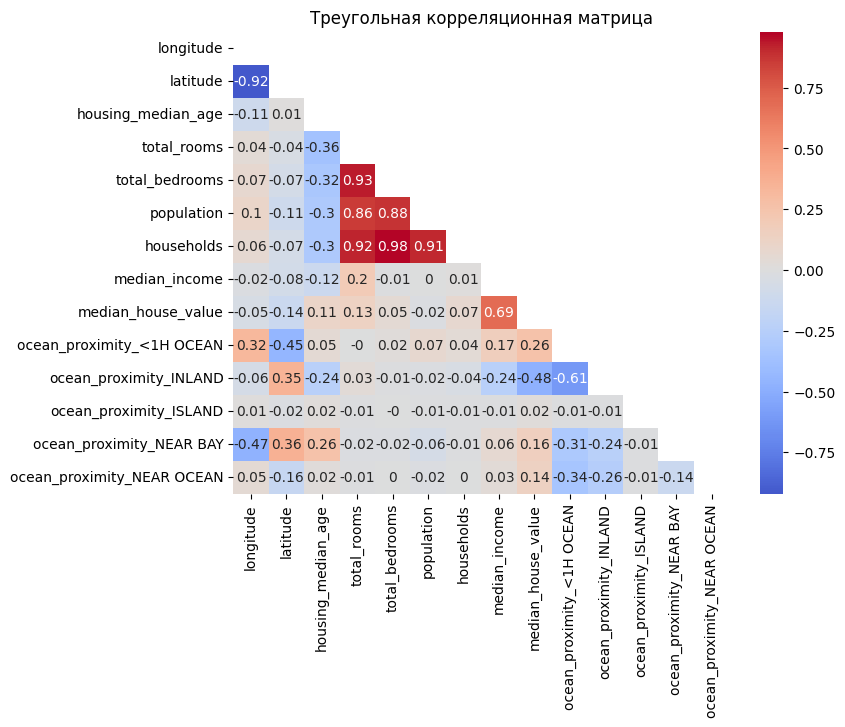

In [42]:
corr_matrix = df_encoded.corr().round(2)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Построение тепловой карты с маской верхнего треугольника
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', center=0)
plt.title("Треугольная корреляционная матрица")
plt.show()

#### Выводы из корреляционной матрицы

- **Сильная положительная корреляция**:
  - `total_rooms` и `total_bedrooms` (0.93), а также группы `population`, `households`, `total_rooms`, и `total_bedrooms` (0.91–0.98). Это логично, так как большее население связано с большим количеством комнат и домохозяйств.
  
- **Корреляция с ценой жилья (`median_house_value`)**:
  - **Наиболее значимая**: `median_income` (0.69) — более высокий доход связан с более дорогим жильем.
  - **Положительная**: `ocean_proximity_<1H OCEAN` (0.26) — жилье ближе к океану стоит дороже.
  - **Отрицательная**: `ocean_proximity_INLAND` (-0.48) — удаленные от океана районы дешевле.

- **Слабая корреляция с ценой жилья**:
  - `housing_median_age`, `total_rooms`, `total_bedrooms`, `population`, и `households` имеют слабое влияние на стоимость жилья (коэффициенты около 0.1 или ниже).

Основные факторы, влияющие на стоимость жилья: **доход населения** и **близость к океану**.

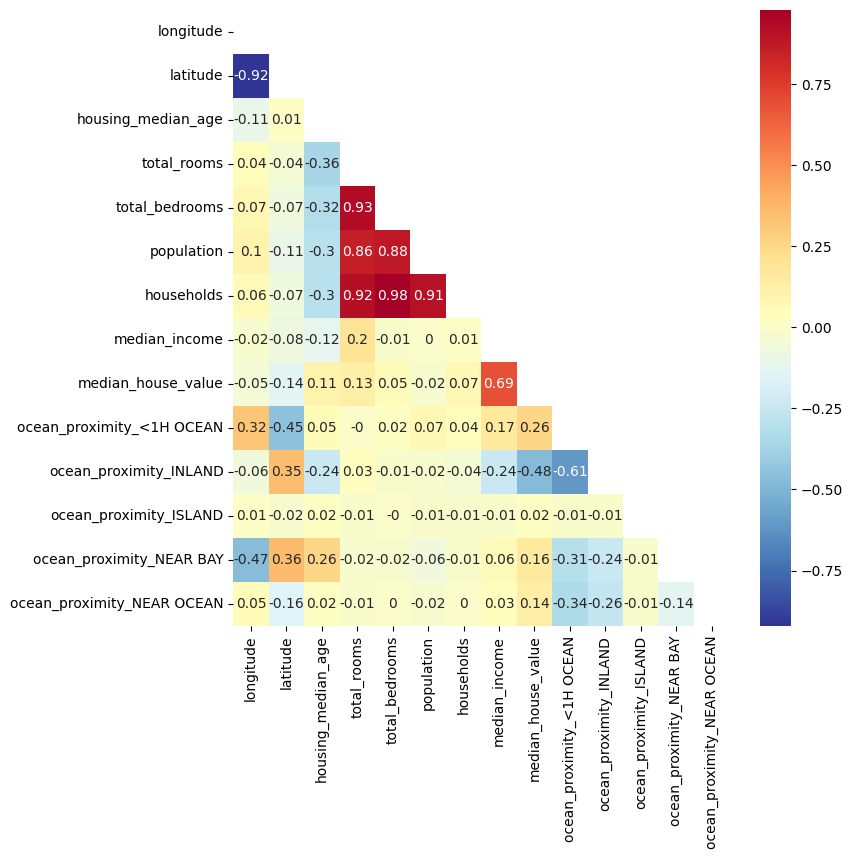

In [43]:
# Корреляция Пирсона 
plt.figure(figsize=(8,8))
sns.heatmap(df_encoded.corr().round(2), mask=mask, cmap="RdYlBu_r", annot=True);

<Axes: >

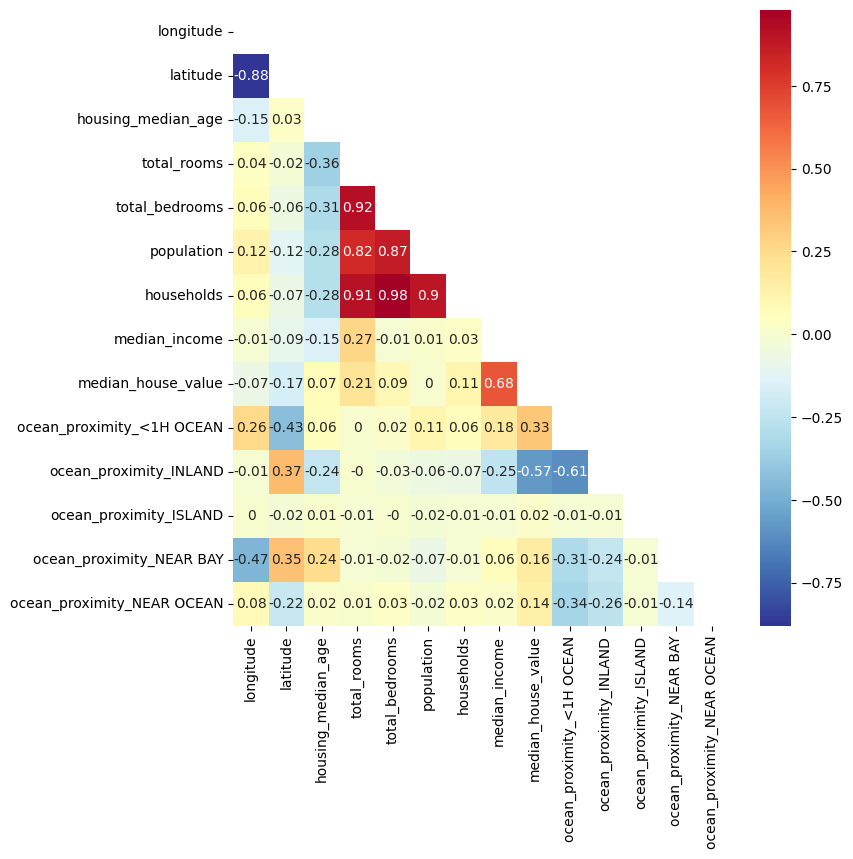

In [44]:
# Коэффициент ранговой корреляции Спирмена
plt.figure(figsize=(8, 8))
sns.heatmap(df_encoded.corr(method='spearman').round(2), mask=mask, cmap="RdYlBu_r", annot=True)

### Ковариация

#### Зачем проводилась нормализация перед ковариацией?

Нормализация данных перед расчетом ковариации необходима для того, чтобы привести переменные к одному масштабу. Без нормализации ковариация была бы сильно искажена из-за различий в единицах измерения переменных (например, число комнат и доход). Нормализация помогает увидеть реальные взаимосвязи между переменными, избегая влияния масштаба.

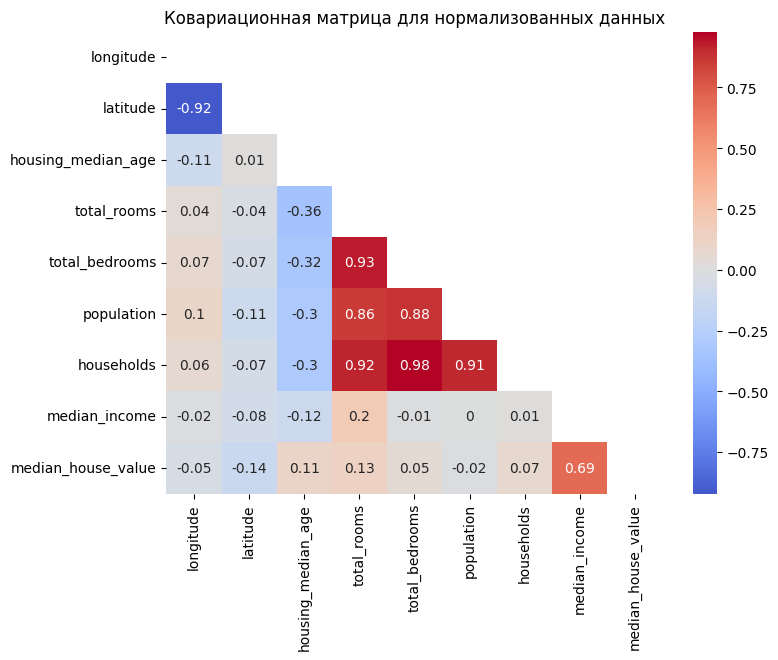

In [45]:
from sklearn.preprocessing import StandardScaler
# Нормализация числовых данных
scaler = StandardScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df_encoded.select_dtypes(include='number')), columns=df_encoded.select_dtypes(include='number').columns)

# Вычисление ковариационной матрицы
cov_matrix = df_normalized.cov().round(2)
mask = np.triu(np.ones_like(cov_matrix, dtype=bool))

# Построение тепловой карты для нормализованных данных
plt.figure(figsize=(8, 6))
sns.heatmap(cov_matrix, mask=mask, annot=True, cmap='coolwarm', center=0)
plt.title("Ковариационная матрица для нормализованных данных")
plt.show()

#### Выводы из нормализованной ковариационной матрицы

- **latitude и longitude**: Имеют сильную отрицательную ковариацию (-0.92), что объясняется географическим расположением (на карте широта и долгота Калифорнии обратно пропорциональны).

- **total_rooms, total_bedrooms, population, households**: Эти переменные имеют высокую положительную ковариацию (0.86–0.98). Это указывает на тесную взаимосвязь, что логично: районы с большим количеством населения и домохозяйств имеют большее число комнат и спален.

- **median_income и median_house_value**: Ковариация составляет 0.69, что указывает на значимую положительную зависимость. Более высокий доход связан с более высокой стоимостью жилья.

- **Слабые взаимосвязи с ценой жилья**:
  - `housing_median_age`, `total_rooms`, и `households` имеют низкую ковариацию с `median_house_value`, что указывает на слабую связь.


Нормализованная ковариационная матрица позволяет увидеть реальные взаимосвязи между переменными без влияния масштаба. Основные факторы, влияющие на стоимость жилья, — это **доход населения** и **взаимосвязь с населением и домохозяйствами**.

### Географическое расположение 

Построим на карте для оценки, где располагается самое дорогое жилье 

In [46]:
# взаимосвязь средних значений жилья относительно расположения 
fig = px.density_mapbox(
    df,
    lat='latitude',
    lon='longitude',
    z='median_house_value',
    radius=9,
    center=dict(lat=37.42, lon=-120.7),
    zoom=4,
    mapbox_style='open-street-map',
    color_continuous_scale='rainbow',
    opacity=0.6,
)
fig.show()

### Phik: Анализ ассоциаций

`Phik` позволяет исследовать связь между числовыми и категориальными признаками, что помогает избежать сложностей традиционных методов корреляции. Этот подход фокусируется на выявлении ассоциаций, что особенно полезно для глубокого анализа данных.

#### Важность для анализа
В нашем случае целевая переменная — **`median_house_value`**. Анализ с помощью `Phik` помогает определить признаки, которые наиболее связаны с ней. Важные признаки:
- **long** (долгота)
- **lat** (широта)
- **median_income** (медианный доход)
- **ocean_proximity** (близость к океану)

Использование `Phik` обеспечивает более точное понимание данных и помогает выделить ключевые взаимосвязи для дальнейшего анализа.


interval columns not set, guessing: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']


<Axes: >

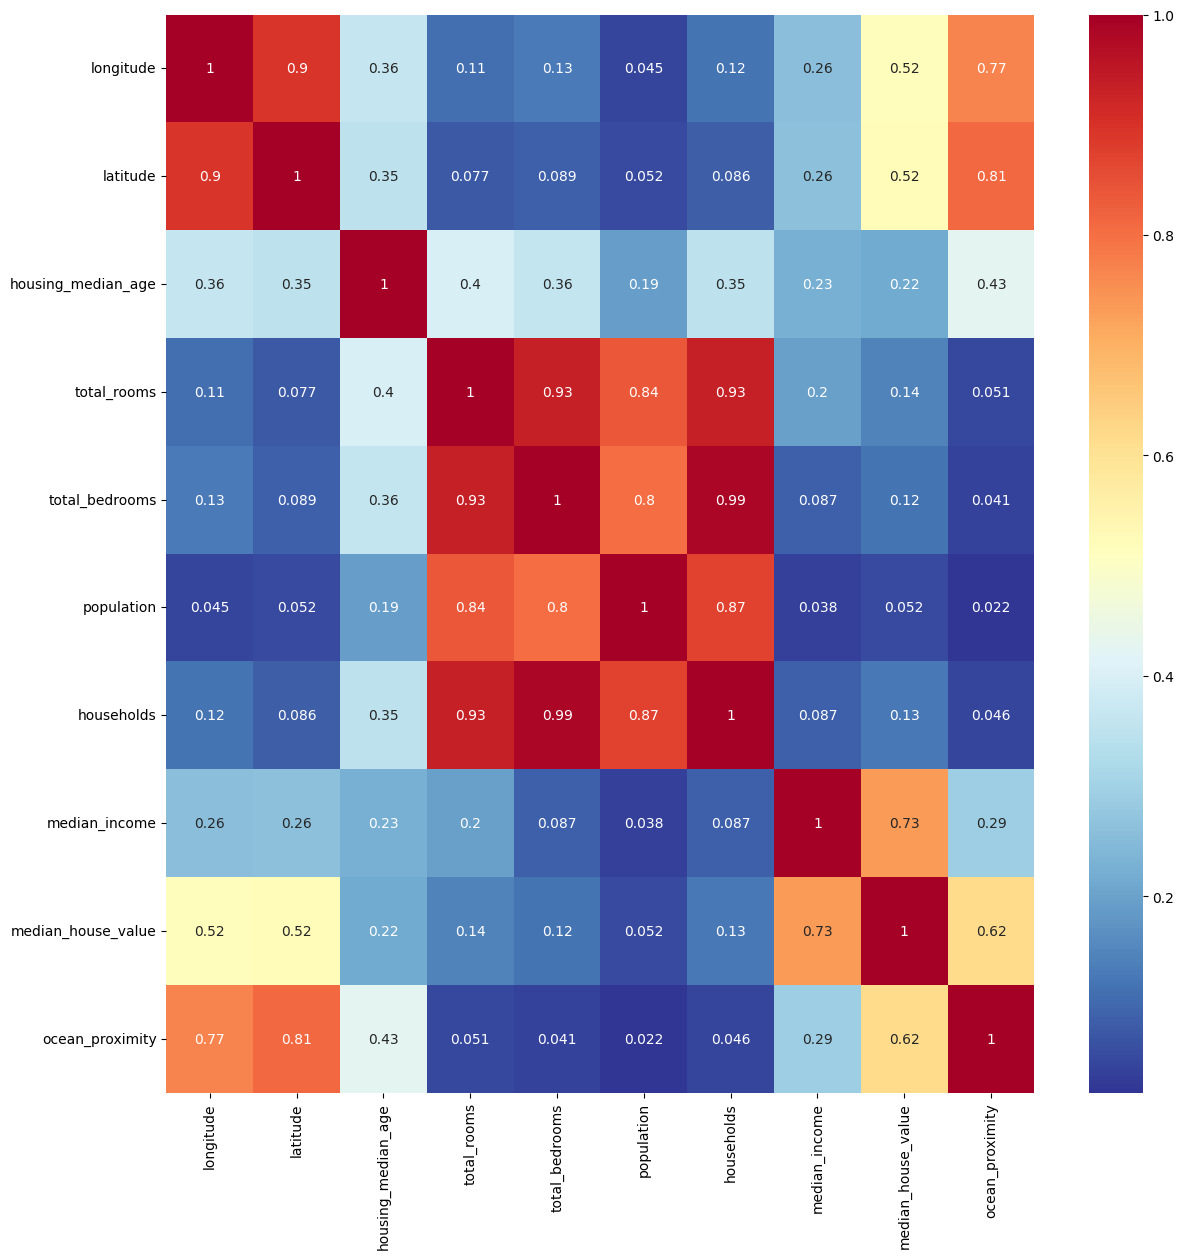

In [47]:
from phik import resources
from phik.report import plot_correlation_matrix

plt.figure(figsize=(14, 14))
sns.heatmap(df.phik_matrix(), cmap="RdYlBu_r", annot=True)

### PCA 

In [48]:
num_cols = df.select_dtypes(exclude='object')
num_cols

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [49]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(num_cols)
df_scaled[:5]

array([[-1.32783522,  1.05254828,  0.98214266, -0.8048191 , -0.97032521,
        -0.9744286 , -0.97703285,  2.34476576,  2.12963148],
       [-1.32284391,  1.04318455, -0.60701891,  2.0458901 ,  1.34827594,
         0.86143887,  1.66996103,  2.33223796,  1.31415614],
       [-1.33282653,  1.03850269,  1.85618152, -0.53574589, -0.82556097,
        -0.82077735, -0.84363692,  1.7826994 ,  1.25869341],
       [-1.33781784,  1.03850269,  1.85618152, -0.62421459, -0.71876767,
        -0.76602806, -0.73378144,  0.93296751,  1.16510007],
       [-1.33781784,  1.03850269,  1.85618152, -0.46240395, -0.61197437,
        -0.75984669, -0.62915718, -0.012881  ,  1.17289952]])

In [50]:
print(df.shape)
print(df_scaled.shape)

(20640, 10)
(20640, 9)
